# <center> Кластеризация изображений транспортных средств

## Постановка задачи

<center> <img src=https://i.ibb.co/t8DvkyB/smart-city-image-1.jpg align="right" width="300"/> </center>
<center> <img src=https://i.ibb.co/qYkWNVh/smart-city-image-3.jpg align="right" width="300"/> </center>


Один из ключевых проектов IntelliVision — Smart City/Transportation, система, обеспечивающая безопасность дорожного движения и более эффективную работу парковок. С помощью Smart City/Transportation можно контролировать сигналы светофоров и соблюдение ограничений скорости, определять виды транспортных средств, распознавать номерные знаки, считать автомобили и людей.

В основе всех перечисленных возможностей проекта лежит CV (Computer Vision, компьютерное зрение). Чтобы их реализовать, компания использует модели, для обучения которых применяются огромные размеченные датасеты с изображениями транспортных средств. Однако система работает в режиме реального времени и с каждым днём данных становится всё больше. Алгоритм нуждается в постоянной модернизации и должен учитывать множество факторов.

Для модификации и повышения эффективности системы Smart City/Transportation команде необходимо автоматизировать определение дополнительных параметров авто на изображении:

* тип автомобиля (кузова),
* ракурс снимка (вид сзади/спереди),
* цвет автомобиля,
* другие характеристики.

Также необходимо автоматизировать поиск выбросов в данных (засветы и блики на изображениях, изображения, на которых отсутствуют автомобили и т. д.).

К сожалению, у компании нет комплексной модели, которая могла бы одновременно находить на изображении автомобиль и определять все нужные параметры. Её нужно построить, однако многокомпонентная разметка новых данных по всем этим параметрам — очень трудозатратное занятие, которое стоит больших денег.

При решении задачи разметки данных у команды возникла гипотеза, которая нуждается в исследовании.


**Гипотеза:** разметку исходных данных можно эффективно провести с помощью методов кластеризации. 


**В чём идея?**

*Давайте будем использовать небольшой набор моделей свёрточных нейронных сетей, обученных на различных датасетах и решающих различные задачи от классификации изображений по цвету до классификации типов транспортных средств, пропустим нашу базу изображений через каждую модель, но возьмём не выходной результат модели, а только промежуточное представление признаков (дескриптор), полученное на свёрточных слоях сети.*

*Выполним такую операцию для всех изображений из набора данных, на основе полученных дескрипторов кластеризуем изображения, проинтерпретируем полученные кластеры и попробуем найти в них необходимую информацию.*

Теперь, когда мы обсудили гипотезу, перейдём к постановке задачи.

<center> <img src=https://i.ibb.co/hLcBpZF/2023-03-27-12-11-17.png align="right" width="500"/> </center>

У вас будет набор из 416 314 изображений транспортных средств различных типов, цветов и снятых с разных ракурсов.

Команда IntelliVision уже обработала свой набор данных с помощью нескольких моделей глубокого обучения (свёрточных нейронных сетей) и получила четыре варианта вектора признаков (дескрипторов) для каждого изображения.

**Ваша задача** — используя готовые дескрипторы, разбить изображения на кластеры и проинтерпретировать каждый из них. Для всех вариантов дескрипторов нужно применить несколько алгоритмов кластеризации и сравнить полученные результаты. Сравнивать можно на основе метрик, визуализаций плотностей кластеров и по тому, насколько хорошо интерпретируются кластеры.

Дополнительная подзадача — найти выбросы среди изображений. Это могут быть изображения плохого качества, изображения с бликами или изображения, на которых нет транспортных средств и т. д.

Бизнес-задача: исследовать возможность применения алгоритмов кластеризации для разметки новых данных и поиска выбросов.

Техническая задача для вас как для специалиста в Data Science: построить модель кластеризации изображений на основе дескрипторов, выделяемых с помощью различных архитектур нейронных сетей, проинтерпретировать полученные результаты и выбрать модель или комбинацию моделей, которая выделяет наиболее пригодные для интерпретации признаки.

**Ваши основные цели:**
1. Для каждого типа дескрипторов необходимо:
    * выполнить предобработку дескрипторов;
    * произвести кластеризацию изображений на основе их дескрипторов, подобрав алгоритм и параметры кластеризации;
    * сделать визуализацию полученных кластеров в 2D- или 3D-пространстве;
    * проинтерпретировать полученные кластеры — в паре предложений сформулировать, какие изображения попали в каждый из кластеров.
2. Сравнить между собой полученные кластеризации для каждого типа дескрипторов (по метрикам, визуализации и результатам интерпретации).
3. Выполнить автоматизированный поиск выбросов среди изображений на основе дескрипторов.
4. Дополнительная задача (не оценивается): попробовать воспользоваться смесью дескрипторов, полученных различными моделями, и проинтерпретировать полученные результаты.

**Примечание.** При выборе алгоритма кластеризации следует ориентироваться на внутренние метрики, а именно на индекс Калински — Харабаса (`calinski_harabasz_score`) и индекс Дэвиса — Болдина (`davies_bouldin_score`), а также на интерпретируемость кластеров и визуализацию.

## Данные и их описание

Исходная папка с данными имеет следующую структуру:

```
IntelliVision_case
├─descriptors
    └─efficientnet-b7.pickle
    └─osnet.pickle
    └─vdc_color.pickle
    └─vdc_type.pickle
├─row_data
    └─veriwild.zip
├─images_paths.csv 
```

Давайте разберёмся в ней:

* В папке `descriptors` содержатся дескрипторы, полученные для каждого из изображений с помощью соответствующих нейронных сетей, в формате numpy-массивов, сохранённых в файлах pickle:
    * `efficientnet-b7.pickle` — дескрипторы, выделенные моделью классификации с архитектурой EfficientNet версии 7. Эта модель является свёрточной нейронной сетью, предобученной на на датасете ImageNet, в котором содержатся изображения более 1000 различных классов. Эта модель при обучении не видела датасета veriwiId. 

    * `osnet.pickle` — дескрипторы, выделенные моделью OSNet, обученной для детектирования людей, животных и машин. Модель не обучалась на исходном датасете veriwiId.

    * `vdc_color.pickle` — дескрипторы, выделенные моделью регрессии для определения цвета транспортных средств в формате RGB. Частично обучена на исходном датасете veriwild.
    
    * `vdc_type.pickle` — дескрипторы, выделенные моделью классификации транспортных средств по типу на десяти классах. Частично обучена на исходном датасете veriwild.

* В папке `row_data` содержится zip-архив с исходными изображениями автомобилей. Распакуйте его содержимое в папку row_data. Архив содержит десять папок с изображениями, пронумерованных от 1 до 10. Каждая папка содержит подпапки, обозначенные пятизначными цифрами, например 36191. 

В каждой из таких подпапок содержатся фотографии одного конкретного автомобиля с разных ракурсов, снятые с помощью дорожных видеокамер.

* В файле `images_paths.csv` представлен список из полных путей до изображений. Он пригодится вам при анализе изображений, попавших в определённый кластер.


Импорт базовых библиотек:

In [1]:
# ! pip install cudf-cu11 dask-cudf-cu11 --extra-index-url=https://pypi.nvidia.com
# ! pip install cuml-cu11 --extra-index-url=https://pypi.nvidia.com
# ! pip install cugraph-cu11 --extra-index-url=https://pypi.nvidia.com
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 385, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 385 (delta 86), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (385/385), 105.74 KiB | 13.22 MiB/s, done.
Resolving deltas: 100% (188/188), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.3 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS cuDF, cuML, and cuGraph via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496

In [2]:
import cupy as cp
import cudf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Прочитайте numpy-массивы из предоставленных pickle-файлов.

**Примечание** Для удобства дальнейшей работы вы можете составить четыре DataFrame с путями до изображений и соответствующими им дескрипторами.

Посмотрите на размерности каждой из четырёх заданных матриц и сравните использованные модели глубокого обучения по размерностям выходных дескрипторов изображений. 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pickle

desc = cudf.DataFrame(pickle.load(open(
    '/content/drive/MyDrive/SkillFactory/IntelliVision_case/descriptors/efficientnet-b7.pickle', 
    'rb'))).sample(frac=0.05)
# desc_2 = pd.DataFrame(pickle.load(open(
#     '/content/drive/MyDrive/SkillFactory/IntelliVision_case/descriptors/osnet.pickle', 
#     'rb')))
# desc_3 = pd.DataFrame(pickle.load(open(
#     '/content/drive/MyDrive/SkillFactory/IntelliVision_case/descriptors/vdc_color.pickle', 
#     'rb')))
# desc_4 = pd.DataFrame(pickle.load(open(
#     '/content/drive/MyDrive/SkillFactory/IntelliVision_case/descriptors/vdc_type.pickle', 
#     'rb')))

images = cudf.DataFrame(pd.read_csv('/content/drive/MyDrive/SkillFactory/IntelliVision_case/images_paths.csv')).iloc[desc.index]

## 2. Преобразование, очистка и анализ данных

Признаки, найденные с помощью некоторых моделей, исчисляются тысячами, что довольно много, учитывая общее количество наблюдений.

Как вы понимаете, производить кластеризацию на таком большом количестве признаков, которые были сформированы исходными моделями глубокого обучения, довольно сложно и затратно по времени. К тому же, многие признаки, найденные моделями на изображениях, могут быть сильно скоррелированы между собой.

Понизьте размерность исходных дескрипторов с помощью соответствующих методов. Можно уменьшить размерность входных данных до 100 или 200 признаков — этого будет достаточно, чтобы произвести кластеризацию, однако рекомендуем вам самостоятельно подобрать необходимое количество компонент в новом пространстве признаков.

Также позаботьтесь о масштабе признаков, воспользовавшись стандартизацией и нормализацией. После кластеризации определите, какой вариант масштабирования более успешен для каждого варианта дескрипторов.


In [5]:
from cuml.preprocessing import StandardScaler

scaler = StandardScaler()

desc = cudf.DataFrame(scaler.fit_transform(desc))

# desc_2_scaled = cudf.DataFrame(scaler.fit_transform(desc_2))
# desc_3_scaled = cudf.DataFrame(scaler.fit_transform(desc_3))
# desc_4_scaled = cudf.DataFrame(scaler.fit_transform(desc_4))

In [6]:
from cuml.decomposition import PCA

def get_principal_components(data):
  for n in range(100, 1000, 20):
    pca = PCA(n_components=n)
    principal_components = pca.fit_transform(data)
    if pca.explained_variance_ratio_.sum() > 0.8:
      return principal_components


In [7]:
# from cuml.decomposition import PCA

# def get_principal_components(data):

#   n_components = []

#   for n in np.linspace(0.9,0.5,5):
#       pca = PCA(n_components=n)
#       principal_components = pca.fit_transform(desc_1_scaled)
#       n_components.append(principal_components.shape[1])
        
#   result = pd.DataFrame({
#       'explained variance':np.linspace(0.9,0.5,5),
#       'n_components':n_components
#       })
  
#   return display(result)

In [8]:
# def get_principal_components(data):

#   pca = PCA(n_components=0.8)
#   principal_components = pca.fit_transform(desc_1_scaled)

#   return principal_components

In [9]:
desc = get_principal_components(desc)
# desc_2_pca = get_principal_components(desc_2_scaled)
# desc_3_pca = get_principal_components(desc_3_scaled)
# desc_4_pca = get_principal_components(desc_4_scaled)

## 3. Моделирование и оценка качества модели

### 3.1. Кластеризация изображений

После предобработки исходных данных произведите кластеризацию для каждого набора дескрипторов.

Для решения задачи используйте несколько различных методов, подобрав оптимальное количество кластеров для каждого метода и варианта дескрипторов.

В качестве метрики для подбора оптимального количества кластеров используйте внутренние меры индекс Калински — Харабаса (`calinski_harabasz_score`) и индекс Дэвиса — Болдина (`davies_bouldin_score`).

Рекомендуем вынести код для построения моделей кластеризации и подбора их параметров в отдельную функцию, чтобы не множить одинаковый код для четырёх случаев дескрипторов.

**Примечание.** Поскольку исходных данных много, могут возникнуть проблемы с оперативной памятью и скоростью работы таких алгоритмов, как K-Means. Вместо стандартного алгоритма K-Means можно воспользоваться реализацией MiniBatchKMeans. 

**Примечание.** Постарайтесь написать чистый код, максимально уменьшая количество дублирующихся участков.

In [10]:
from cuml.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def get_scales_figs(data):    

    calinski_harabasz = []
    davies_bouldin = []
    silhouette = []

    for n in range(2,16):
        
      kmeans = KMeans(
          n_clusters=n)
   
      kmeans.fit_predict(data)      

      calinski_harabasz.append(calinski_harabasz_score(data.to_numpy(), kmeans.labels_.to_numpy()))
      davies_bouldin.append(davies_bouldin_score(data.to_numpy(), kmeans.labels_.to_numpy()))
      silhouette.append(silhouette_score(data.to_numpy(), kmeans.labels_.to_numpy()))
            
    n_clusters_scales = pd.DataFrame({
        'n_clusters':range(2,16),
        'silhouette_score':silhouette,
        'calinski_harabasz':calinski_harabasz,
        'davies_bouldin':davies_bouldin
    })

    fig_sil = px.line(
        data_frame = n_clusters_scales,
        x = 'n_clusters',
        y = 'silhouette_score',
        title = 'Зависимость коэффициента силуэта от количества кластеров',
        width=800
        )   

    fig_ch = px.line(
        data_frame = n_clusters_scales,
        x = 'n_clusters',
        y = 'calinski_harabasz',
        title = 'Зависимость индекса Калински — Харабаса от количества кластеров',
        width=800
        )

    fig_db = px.line(data_frame = n_clusters_scales,
        x = 'n_clusters',
        y = 'davies_bouldin',
        title='Зависимость индекса Дэвиса — Болдина от количества кластеров',
        width=800
    )

    fig_sil.show()
    fig_ch.show()
    fig_db.show()

def get_cluster(data, best_n):
        kmeans = KMeans(
            n_clusters=best_n)    
        kmeans.fit_predict(data)
        return kmeans.labels_

In [11]:
# from cuml.cluster import AgglomerativeClustering
# from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# def get_scales_figs(data):    

#     calinski_harabasz = []
#     davies_bouldin = []
#     silhouette = []

#     for n in range(2,11):
        
#         agg = AgglomerativeClustering(
#             n_clusters=n
#             )
   
#         agg.fit_predict(data)      

#         calinski_harabasz.append(calinski_harabasz_score(data.to_numpy(), agg.labels_.to_numpy()))
#         davies_bouldin.append(davies_bouldin_score(data.to_numpy(), agg.labels_.to_numpy()))
#         silhouette.append(silhouette_score(data.to_numpy(), agg.labels_.to_numpy()))
            
#     n_clusters_scales = pd.DataFrame({
#         'n_clusters':range(2,11),
#         'silhouette_score':silhouette,
#         'calinski_harabasz':calinski_harabasz,
#         'davies_bouldin':davies_bouldin
#     })

#     fig_sil = px.line(
#         data_frame = n_clusters_scales,
#         x = 'n_clusters',
#         y = 'silhouette_score',
#         title = 'Зависимость коэффициента силуэта от количества кластеров',
#         width=800
#         )   

#     fig_ch = px.line(
#         data_frame = n_clusters_scales,
#         x = 'n_clusters',
#         y = 'calinski_harabasz',
#         title = 'Зависимость индекса Калински — Харабаса от количества кластеров',
#         width=800
#         )

#     fig_db = px.line(data_frame = n_clusters_scales,
#         x = 'n_clusters',
#         y = 'davies_bouldin',
#         title='Зависимость индекса Дэвиса — Болдина от количества кластеров',
#         width=800
#     )

#     fig_sil.show()
#     fig_ch.show()
#     fig_db.show()

# def get_cluster(data, best_n):
#         agg = AgglomerativeClustering(
#             n_clusters=best_n)    
#         agg.fit_predict(data)
#         return agg.labels_

Вычислим метрики кластеризации в зависимости от количества кластеров для первого дескриптора:

In [12]:
get_scales_figs(desc)

Наилучшие результаты кластеризации первого дескриптора наблюдаются при разбиении на 2 кластера.

In [13]:
best_n = 5

labels = get_cluster(desc, best_n)

### 3.2. Интерпретация кластеров

#### 3.2.1 Визуализация кластеров

Визуализируйте результаты кластеризации в двух- или трёхмерном пространстве, предварительно понизив размерность дескрипторов изображений до соответствующих размерностей с помощью метода t-SNE. 

По результатам визуализации кластеров сделайте предположение о качестве полученной кластеризации.

In [14]:
from cuml.manifold import TSNE

def cluster_fig(data):

    tsne = TSNE(n_components=2)
    data_tsne = pd.DataFrame(tsne.fit_transform(data).to_numpy())

    data_tsne['label'] = labels.to_numpy()

    fig = px.scatter(
        data_frame=data_tsne,
        x=0,
        y=1,
        color='label',
        title='Визуализация кластеров'
    )
    
    return fig.show()

In [15]:
cluster_fig(desc)
# cluster_fig(desc_2_pca)
# cluster_fig(desc_3_pca)
# cluster_fig(desc_4_pca)

#### 3.2.2. Визуализация изображений в кластере


Визуализируйте несколько изображений из каждого кластера, чтобы проинтерпретировать результаты.

**Как визуализировать изображения, соответствующие определённому кластеру?**

Мы не рассматривали работу с изображениями как отдельную тему, однако не волнуйтесь — в этом нет ничего страшного.

В стандартных библиотеках для визуализации, которые мы изучали ранее, есть встроенный функционал для чтения и визуализации изображений. Например, в библиотеке matplotlib есть функция `plt.imread()`, которая позволяет читать изображение по переданному пути. Она возвращает numpy-массив размерности (h, w, c), где:

* h — высота изображения, 
* w — его ширина,
* c — количество каналов.

Так как все изображения в нашем датасете цветные, каналов (c) три:

* R — матрица интенсивности пикселей красного цвета,
* G — матрица интенсивности пикселей зелёного цвета,
* B — матрица интенсивности пикселей синего цвета.

Например, вот так можно прочитать изображение 000001.jpg:

```python
img = plt.imread('raw_data/veriwild/1/00001/000001.jpg')
print(img.shape)
## (557, 756, 3)
```

То есть изображение состоит из трёх матриц (R, G и B) с размерностью 557 строк на 756 столбцов. Элементами каждой из матриц являются интенсивности пикселей (от 0 до 255) соответствующего цвета.

Что касается вывода изображений на экран, в библиотеке matplotlib есть встроенная функция `plt.imshow()`, которая позволяет вывести переданное ей в аргументы изображение:

```python
fig = plt.figure(figsize=(5, 5))
plt.imshow(img);
```

Функцию `imshow()` можно вызывать и от имени координатных плоскостей при использовании `subplots` из библиотеки `matplotlib`:

```python
img1 = plt.imread('raw_data/veriwild/1/00001/000001.jpg')
img2 = plt.imread('raw_data/veriwild/1/00001/000002.jpg')
fig, axes = plt.subplots(1, 2, figsize=(5, 5))
axes[0].imshow(img1);
axes[1].imshow(img2);
```

После кластеризации для интерпретации результатов вам понадобится визуализировать несколько изображений из каждого кластера. Для этого мы подготовили функцию `plot_sample_cluster_images()`.

In [16]:
def plot_samples_images(data, cluster_label, nrows=3, ncols=3, figsize=(12, 5)):
    """Функция для визуализации нескольких случайных изображений из кластера cluster_label.
    Пути до изображений и метки кластеров должны быть представлены в виде DataFrame со столбцами "paths" и "cluster".


    Args:
        data (DataFrame): таблица с разметкой изображений и соответствующих им кластеров.
        cluster_label (int): номер кластера изображений.
        nrows (int, optional): количество изображений по строкам таблицы (по умолчанию 3).
        ncols (int, optional): количество изображений по столбцам (по умолчанию 3).
        figsize (tuple, optional): размер фигуры (по умолчанию (12, 5)).
    """
    # Фильтруем данные по номеру кластера
    samples_indexes = np.array(data[data['cluster'] == cluster_label].index)
    # Перемешиваем результаты
    np.random.shuffle(samples_indexes)
    # Составляем пути до изображений
    paths = data.loc[samples_indexes, 'paths']
   
    # Создаём фигуру и набор координатных плоскостей
    fig, axes = plt.subplots(nrows,ncols)
    # Устанавливаем размер фигуры
    fig.set_size_inches(*figsize)
    # Устанавливаем название графика
    fig.suptitle(f"Images from cluster {cluster_label}", fontsize=16)
    # Создаём цикл по строкам в таблице с координатными плоскостями
    for i in range(nrows):
        # Создаём цикл по столбцам в таблице с координатными плоскостями
        for j in range(ncols):
            # Определяем индекс пути до изображения
            path_idx = i * ncols + j
            if path_idx >= len(paths):
                break
            # Извлекаем путь до изображения
            path = paths.iloc[path_idx]
            # Читаем изображение            
            img = plt.imread('/content/drive/MyDrive/SkillFactory/IntelliVision_case/raw_data/'+path.replace('\\','/'))
            # Отображаем его на соответствующей координатной плоскости
            axes[i,j].imshow(img)
            # Убираем пометки координатных осей
            axes[i,j].axis('off')


Например, вы произвели кластеризацию и записали пути до изображений в виде столбца "paths" и метки кластеров в виде столбца "cluster" в некоторый DataFrame с именем data. Тогда, чтобы визуализировать несколько случайных изображений из кластера 0, вам нужно вызвать функцию `plot_sample_cluster_images()` следующим образом:

```python
plot_samples_images(data=data, cluster_label=0)
```

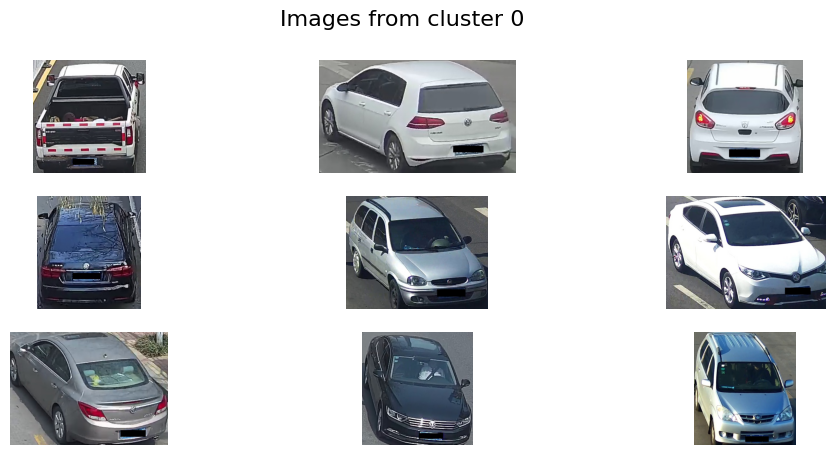

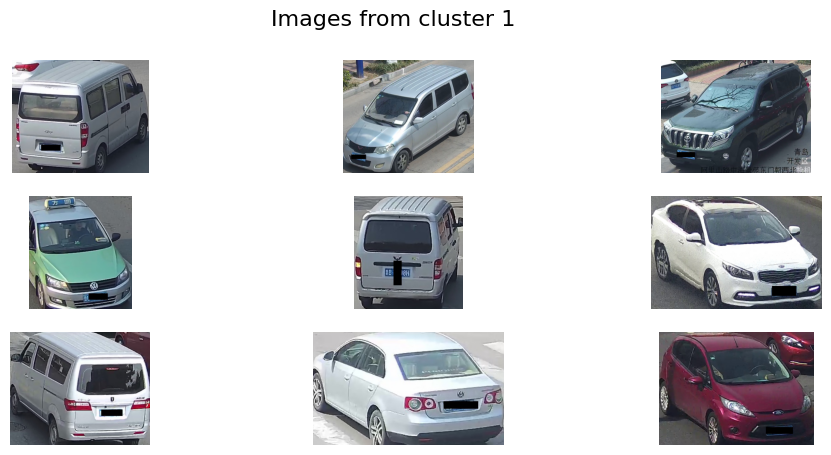

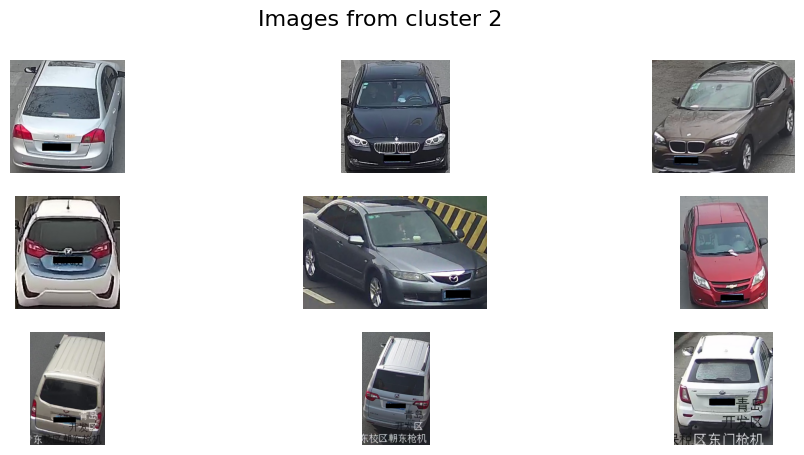

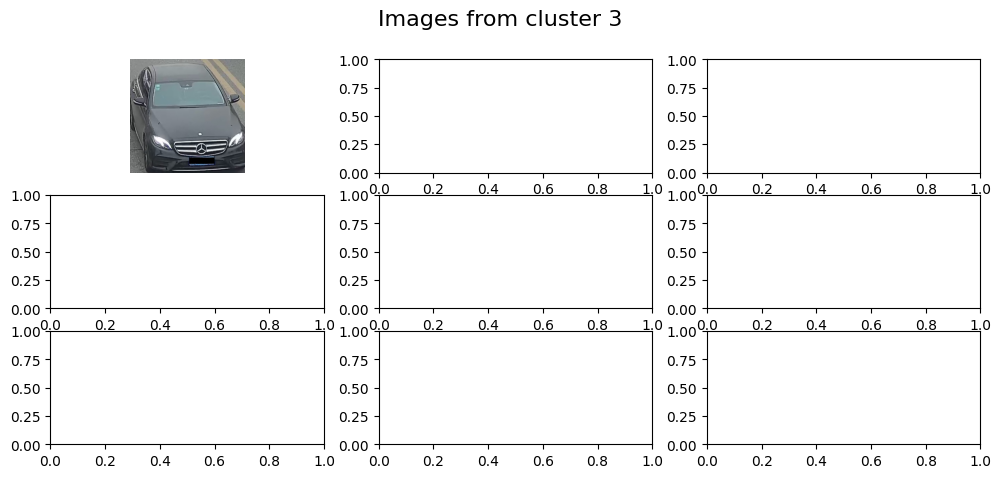

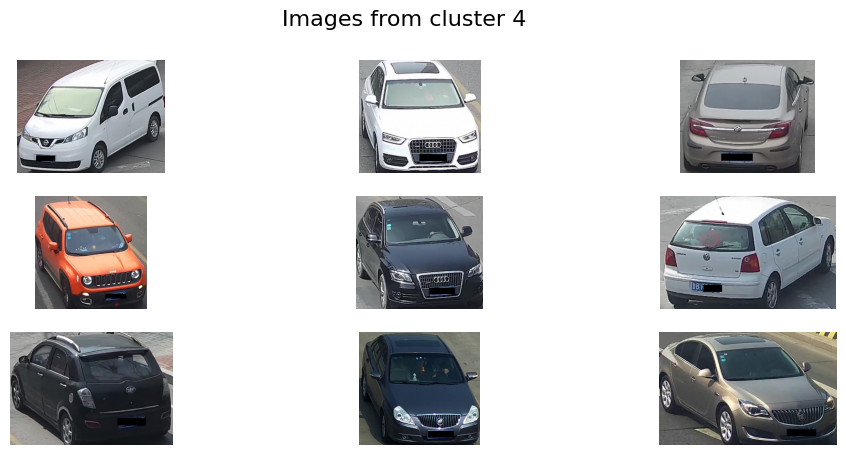

In [17]:
clustered_images_desc = pd.DataFrame(images.to_numpy(), columns = images.columns)
clustered_images_desc['cluster'] = labels.to_numpy()

for n in range(best_n):
    plot_samples_images(data=clustered_images_desc, cluster_label=n)


In [18]:
# clustered_images_desc_2 = images
# clustered_images_desc_2['cluster'] = labels_1
# plot_samples_images(data=clustered_images_desc_1, cluster_label=0)
# plot_samples_images(data=clustered_images_desc_1, cluster_label=1)

In [19]:
# clustered_images_desc_3 = images
# clustered_images_desc_3['cluster'] = labels_1
# plot_samples_images(data=clustered_images_desc_1, cluster_label=0)
# plot_samples_images(data=clustered_images_desc_1, cluster_label=1)

In [20]:
# clustered_images_desc_4 = images
# clustered_images_desc_4['cluster'] = labels_1
# plot_samples_images(data=clustered_images_desc_1, cluster_label=0)
# plot_samples_images(data=clustered_images_desc_1, cluster_label=1)

### 3.3. Поиск выбросов

С помощью известных вам методов поиска выбросов (например, DBSCAN) попытайтесь найти выбросы среди изображений, используя все варианты дескрипторов. Подберите параметры алгоритма.

Визуализируйте изображения, попавшие в раздел выбросов, и попробуйте проинтерпретировать полученные результаты. Подумайте, почему именно эти изображения попали в выбросы.

Сравните результаты для всех вариантов дескрипторов. Какой вариант дескрипторов даёт наилучшее представление о выбросах?



In [21]:
from sklearn.metrics import silhouette_score
from collections import Counter

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=28)

db.fit(pd.DataFrame(desc.to_numpy()))

print(dict(Counter(db.labels_)))

{-1: 4163}


In [22]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering()

agg.fit(pd.DataFrame(desc.to_numpy()))

print(dict(Counter(agg.labels_)))

silhouette_score(desc.to_numpy(), agg.labels_)

{0: 3801, 1: 362}


0.1849332

In [23]:
silhouette_score(desc.to_numpy(), agg.labels_)

0.1849332

## 4. Выводы и оформление проекта

На основе результатов, полученных при выполнении проекта, сделайте вывод по задаче, приведя таблицу со сравнением результатов кластеризации на каждом из наборов дескрипторов. Приведите сравнение вариантов предобработки исходных данных по качеству кластеризации.

Результатом вашей работы должно стать небольшое исследование, в котором вы даёте команде IntelliVision рекомендации, какие дескрипторы, с какой предобработкой и каким алгоритмом кластеризации лучше всего подходят для решения задачи.

Также сохраните результаты лучшего алгоритма в CSV-файл со столбцами path (путь до изображения) и cluster (номер кластера). В описании к проекту приведите расшифровку каждого из кластеров.

Когда вы закончите выполнять проект, создайте в своём репозитории файл README.md и кратко опишите содержание проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги (придумайте их самостоятельно в зависимости от того, какую задачу вы решали).